In [4]:
# Importações na venv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
"""As Células abaixo correspondem a 1ª tarefa e a análise inicial"""

# Carregando a Análise Exploratória
df = pd.read_csv('data/Dataset.csv')
print("Informações do Dataset: \n")
display(df.info())
print("\nPrimeiras linhas do dataset:")
display(df.head())

print("Primeiras linhas aparecendo masculino:")
display(df[df['Gênero'] == 'Masculino'].head())



Informações do Dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Idade                190 non-null    float64
 1   Renda Anual (em $)   189 non-null    float64
 2   Gênero               193 non-null    object 
 3   Tempo no Site (min)  200 non-null    float64
 4   Anúncio Clicado      190 non-null    object 
 5   Compra (0 ou 1)      200 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 9.5+ KB


None


Primeiras linhas do dataset:


,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
0,29.0,30000.0,Feminino,5.741706,Não,0
1,58.0,50000.0,Feminino,21.885505,Sim,0
2,50.0,70000.0,Feminino,6.121339,Não,1
3,21.0,100000.0,Feminino,16.264925,Não,0
4,59.0,50000.0,Feminino,28.235667,Sim,1


Primeiras linhas aparecendo masculino:


,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
7,50.0,100000.0,Masculino,23.246508,Não,0
8,34.0,30000.0,Masculino,27.056464,Sim,1
9,41.0,70000.0,Masculino,21.773575,Sim,0
10,51.0,50000.0,Masculino,11.454331,Sim,0
11,45.0,100000.0,Masculino,21.865196,Sim,0


Valores únicos na coluna Gênero:
['Feminino' 'Masculino' nan]

Contagem por Gênero:


Gênero
Masculino    99
Feminino     94
Name: count, dtype: int64

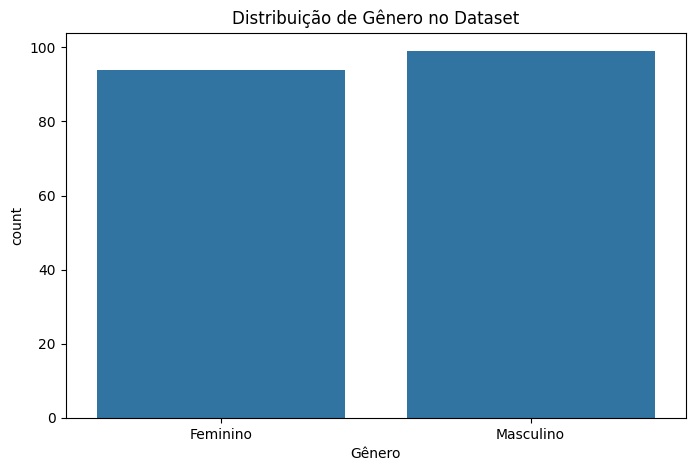


Quantidade de valores nulos em Gênero:
7


In [13]:


'''Distribuição de Gênero'''

# Carregar os dados
df = pd.read_csv('data/Dataset.csv')

# Verificar valores únicos na coluna Gênero
print("Valores únicos na coluna Gênero:")
print(df['Gênero'].unique())

# Contagem de cada gênero
print("\nContagem por Gênero:")
display(df['Gênero'].value_counts())

# Criar um gráfico de barras para visualizar a distribuição
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gênero')
plt.title('Distribuição de Gênero no Dataset')
plt.show()

# Verificar se há valores nulos
print("\nQuantidade de valores nulos em Gênero:")
print(df['Gênero'].isnull().sum())

In [14]:
# 2. Análise de valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
Idade                  10
Renda Anual (em $)     11
Gênero                  7
Tempo no Site (min)     0
Anúncio Clicado        10
Compra (0 ou 1)         0
dtype: int64


In [18]:
# 3. Estatísticas descritivas das variáveis numéricas
print("\nEstatísticas descritivas(raw):")
display(df.describe())



# Ajustando o formato dos números para duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

# Filtrando valores inválidos na coluna "Tempo no Site (min)"
df = df[df['Tempo no Site (min)'] >= 0]

# Selecionando apenas colunas relevantes
colunas_relevantes = ['Idade', 'Renda Anual (em $)', 'Tempo no Site (min)']
stats = df[colunas_relevantes].describe().round(2)

# Exibindo estatísticas descritivas ajustadas e limpas
print("\nEstatísticas descritivas (ajustadas e limpas):")
display(stats)



Estatísticas descritivas(raw):


,Idade,Renda Anual (em $),Tempo no Site (min),Compra (0 ou 1)
count,187.00,185.00,195.00,195.00
mean,38.52,58432.43,17.82,0.33
std,12.66,25775.52,7.23,0.47
min,18.00,30000.00,5.05,0.00
25%,28.00,30000.00,11.72,0.00
50%,38.00,50000.00,18.31,0.00
75%,50.00,70000.00,23.94,1.00
max,59.00,100000.00,29.85,1.00



Estatísticas descritivas (ajustadas e limpas):


,Idade,Renda Anual (em $),Tempo no Site (min)
count,187.00,185.00,195.00
mean,38.52,58432.43,17.82
std,12.66,25775.52,7.23
min,18.00,30000.00,5.05
25%,28.00,30000.00,11.72
50%,38.00,50000.00,18.31
75%,50.00,70000.00,23.94
max,59.00,100000.00,29.85


In [19]:
# Vamos verificar a distribuição da coluna "Compra (0 ou 1)"
compra_dist = df['Compra (0 ou 1)'].value_counts()
print("\nDistribuição da coluna 'Compra (0 ou 1)':")
print(compra_dist)

# Calculando as porcentagens
compra_percent = (compra_dist / len(df)) * 100
print("\nPorcentagem de cada categoria:")
print(compra_percent)



Distribuição da coluna 'Compra (0 ou 1)':
Compra (0 ou 1)
0    130
1     65
Name: count, dtype: int64

Porcentagem de cada categoria:
Compra (0 ou 1)
0   66.67
1   33.33
Name: count, dtype: float64


Tarefa 1: Verificar a distribuição das variáveis.
Abaixo estão gráficos mostrando como os dados estão distribuídos para as variáveis 'Idade', 'Renda Anual' e 'Tempo no Site'. Também mostramos a distribuição de 'Compra'.



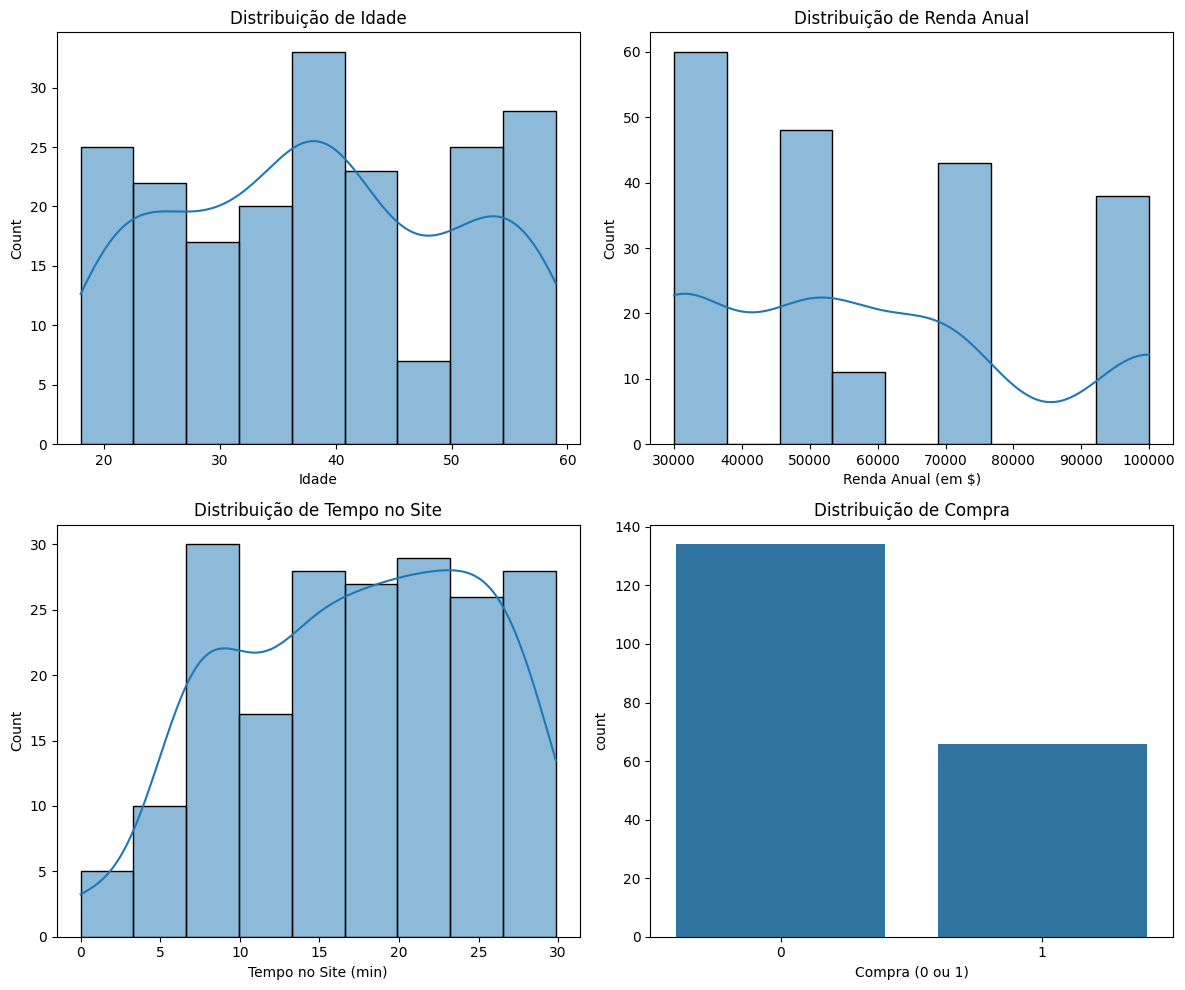

Tarefa 2: Explorar relações entre variáveis independentes e a variável alvo (Compra).
Abaixo estão gráficos que mostram como 'Idade', 'Renda Anual' e 'Tempo no Site' estão relacionados com 'Compra'.



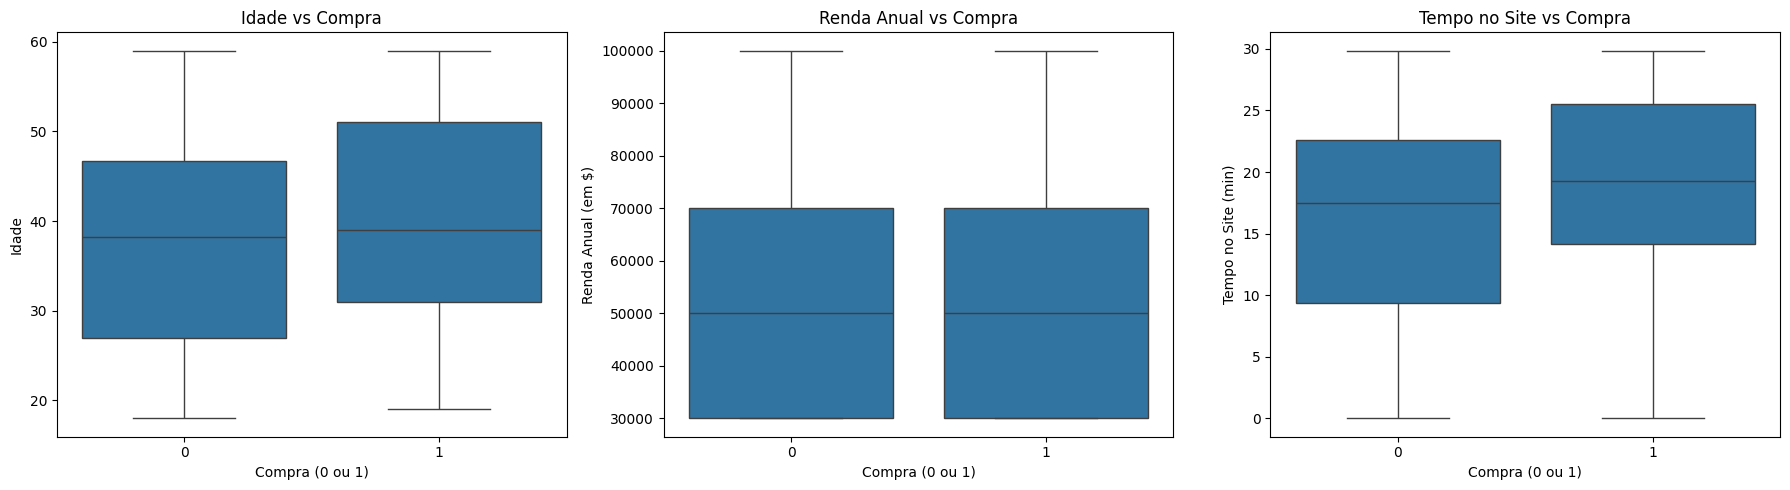

Tarefa 3: Identificar valores ausentes e inconsistências nos dados.
Valores ausentes após o tratamento:
Idade                  0
Renda Anual (em $)     0
Gênero                 0
Tempo no Site (min)    0
Anúncio Clicado        0
Compra (0 ou 1)        0
dtype: int64


In [21]:


# Carregar o dataset para análise
file_path = 'data/Dataset.csv'
data = pd.read_csv(file_path)

# Substituir valores ausentes por médias (para variáveis numéricas) e moda (para categóricas)
data['Idade'] = data['Idade'].fillna(data['Idade'].mean())
data['Renda Anual (em $)'] = data['Renda Anual (em $)'].fillna(data['Renda Anual (em $)'].mean())
data['Gênero'] = data['Gênero'].fillna(data['Gênero'].mode()[0])
data['Anúncio Clicado'] = data['Anúncio Clicado'].fillna(data['Anúncio Clicado'].mode()[0])

# Corrigir inconsistências no 'Tempo no Site'
data['Tempo no Site (min)'] = data['Tempo no Site (min)'].apply(lambda x: max(x, 0))

# 1. Verificar a distribuição das variáveis
print("Tarefa 1: Verificar a distribuição das variáveis.")
print("Abaixo estão gráficos mostrando como os dados estão distribuídos para as variáveis 'Idade', 'Renda Anual' e 'Tempo no Site'. Também mostramos a distribuição de 'Compra'.\n")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(data['Idade'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribuição de Idade')
axes[0, 0].set_xlabel('Idade')

sns.histplot(data['Renda Anual (em $)'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribuição de Renda Anual')
axes[0, 1].set_xlabel('Renda Anual (em $)')

sns.histplot(data['Tempo no Site (min)'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribuição de Tempo no Site')
axes[1, 0].set_xlabel('Tempo no Site (min)')

sns.countplot(x='Compra (0 ou 1)', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Distribuição de Compra')
axes[1, 1].set_xlabel('Compra (0 ou 1)')

plt.tight_layout()
plt.show()

# 2. Explorar relações entre variáveis independentes e a variável alvo
print("Tarefa 2: Explorar relações entre variáveis independentes e a variável alvo (Compra).")
print("Abaixo estão gráficos que mostram como 'Idade', 'Renda Anual' e 'Tempo no Site' estão relacionados com 'Compra'.\n")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x='Compra (0 ou 1)', y='Idade', data=data, ax=axes[0])
axes[0].set_title('Idade vs Compra')
axes[0].set_xlabel('Compra (0 ou 1)')
axes[0].set_ylabel('Idade')

sns.boxplot(x='Compra (0 ou 1)', y='Renda Anual (em $)', data=data, ax=axes[1])
axes[1].set_title('Renda Anual vs Compra')
axes[1].set_xlabel('Compra (0 ou 1)')
axes[1].set_ylabel('Renda Anual (em $)')

sns.boxplot(x='Compra (0 ou 1)', y='Tempo no Site (min)', data=data, ax=axes[2])
axes[2].set_title('Tempo no Site vs Compra')
axes[2].set_xlabel('Compra (0 ou 1)')
axes[2].set_ylabel('Tempo no Site (min)')

plt.tight_layout()
plt.show()

# 3. Identificar valores ausentes (após tratamento) e inconsistências
print("Tarefa 3: Identificar valores ausentes e inconsistências nos dados.")
missing_after = data.isnull().sum()
print("Valores ausentes após o tratamento:")
print(missing_after)


Tarefa 1: Verificar a distribuição de Gênero.
Gráfico mostrando a distribuição de Gênero no dataset.



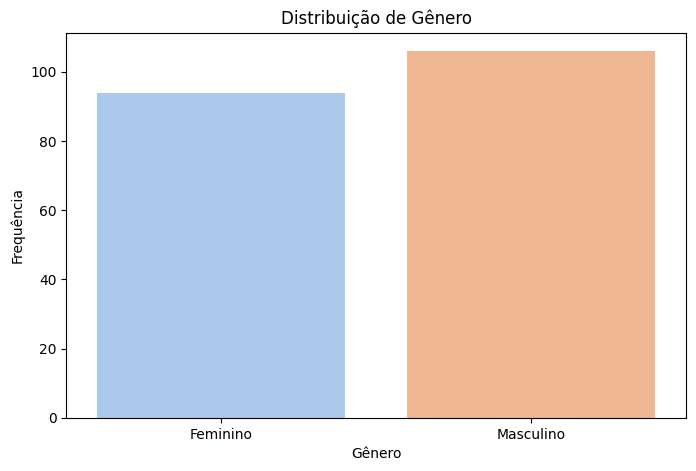

Tarefa 2: Explorar relação entre Gênero e Compra.
Gráfico mostrando como o Gênero está relacionado com Compra.



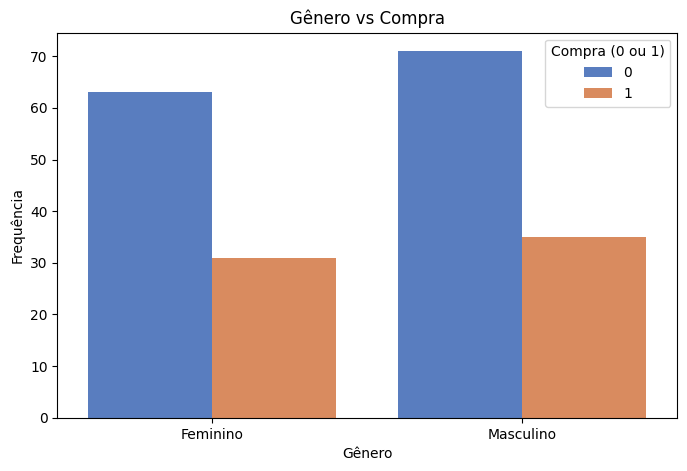

In [25]:
'''Agora focando na variável 'Gênero' '''

# Tarefa 1: Verificar a distribuição da variável 'Gênero'
print("Tarefa 1: Verificar a distribuição de Gênero.")
print("Gráfico mostrando a distribuição de Gênero no dataset.\n")

plt.figure(figsize=(8, 5))
sns.countplot(x='Gênero', data=data, palette='pastel', hue='Gênero', legend=False) # Tive de atribuir 'Anúncio Clicado' ao hue pois estava dando uma msg de warning
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.show()

# Tarefa 2: Explorar relação entre 'Gênero' e 'Compra'
print("Tarefa 2: Explorar relação entre Gênero e Compra.")
print("Gráfico mostrando como o Gênero está relacionado com Compra.\n")

plt.figure(figsize=(8, 5))
sns.countplot(x='Gênero', hue='Compra (0 ou 1)', data=data, palette='muted')
plt.title('Gênero vs Compra')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.legend(title='Compra (0 ou 1)')
plt.show()


Tarefa 1: Verificar a distribuição de Anúncio Clicado.
Gráfico mostrando a distribuição de Anúncio Clicado no dataset.



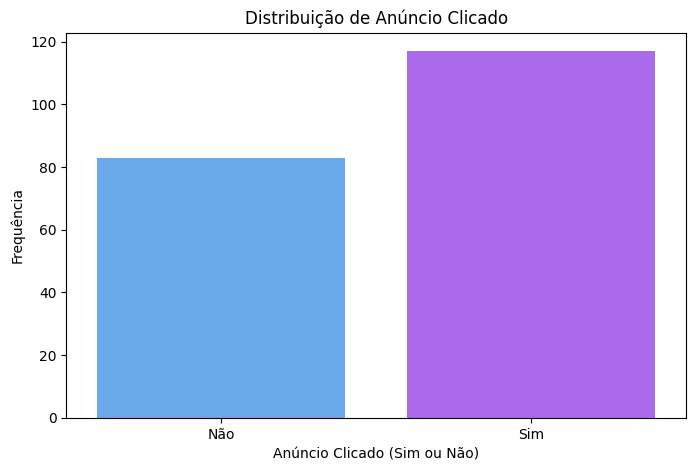

Tarefa 2: Explorar relação entre Anúncio Clicado e Compra.
Gráfico mostrando como Anúncio Clicado está relacionado com Compra.



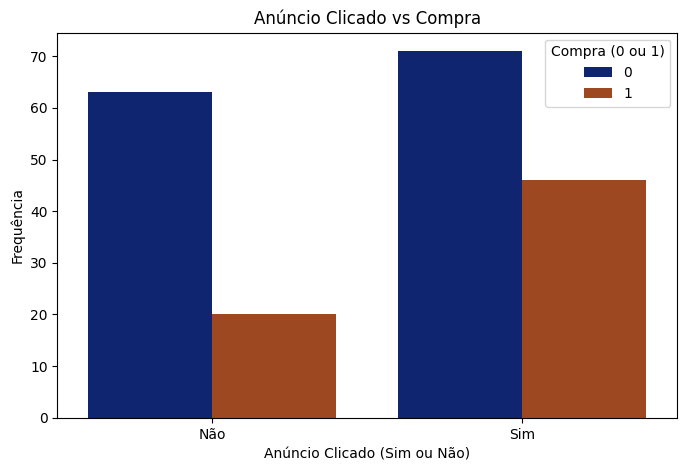

In [26]:
'''Agora focando na variável 'Anúncio Clicado' '''

# Tarefa 1: Verificar a distribuição da variável 'Anúncio Clicado'
print("Tarefa 1: Verificar a distribuição de Anúncio Clicado.")
print("Gráfico mostrando a distribuição de Anúncio Clicado no dataset.\n")

plt.figure(figsize=(8, 5))
sns.countplot(x='Anúncio Clicado', data=data, palette='cool', hue='Anúncio Clicado', legend=False) # Tive de atribuir 'Anúncio Clicado' ao hue pois estava dando uma msg de warning
plt.title('Distribuição de Anúncio Clicado')
plt.xlabel('Anúncio Clicado (Sim ou Não)')
plt.ylabel('Frequência')
plt.show()

# Tarefa 2: Explorar relação entre 'Anúncio Clicado' e 'Compra'
print("Tarefa 2: Explorar relação entre Anúncio Clicado e Compra.")
print("Gráfico mostrando como Anúncio Clicado está relacionado com Compra.\n")

plt.figure(figsize=(8, 5))
sns.countplot(x='Anúncio Clicado', hue='Compra (0 ou 1)', data=data, palette='dark')
plt.title('Anúncio Clicado vs Compra')
plt.xlabel('Anúncio Clicado (Sim ou Não)')
plt.ylabel('Frequência')
plt.legend(title='Compra (0 ou 1)')
plt.show()



In [5]:
"""As Células abaixo correspondem a 2ª tarefa"""

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Carregar os dados
df = pd.read_csv('data/Dataset.csv')

# 1. Tratamento de valores ausentes
# Primeiro, vamos criar um imputer para valores numéricos (usando a mediana)
numeric_features = ['Idade', 'Renda Anual (em $)', 'Tempo no Site (min)']
numeric_imputer = SimpleImputer(strategy='median')

# Imputar valores numéricos
df[numeric_features] = numeric_imputer.fit_transform(df[numeric_features])

# Tratar valores ausentes em variáveis categóricas (usando moda)
categorical_features = ['Gênero', 'Anúncio Clicado']
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])

# 2. Tratar valores inconsistentes
# Corrigir valores negativos no tempo do site (substituir pela mediana)
df.loc[df['Tempo no Site (min)'] < 0, 'Tempo no Site (min)'] = df['Tempo no Site (min)'].median()

# 3. Codificação de variáveis categóricas
# Usando Label Encoder para transformar variáveis categóricas
le_genero = LabelEncoder()
le_anuncio = LabelEncoder()

df['Genero_encoded'] = le_genero.fit_transform(df['Gênero'])
df['Anuncio_encoded'] = le_anuncio.fit_transform(df['Anúncio Clicado'])

# 4. Normalização das variáveis numéricas
scaler = StandardScaler()
df[['Idade_scaled', 'Renda_scaled', 'Tempo_scaled']] = scaler.fit_transform(df[numeric_features])


# 5. Preparar X (features) e y (target)
features = ['Idade_scaled', 'Renda_scaled', 'Tempo_scaled', 
           'Genero_encoded', 'Anuncio_encoded']
X = df[features]
y = df['Compra (0 ou 1)']

In [6]:
# 6. Dividir em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar as dimensões dos conjuntos de dados
print("Dimensões dos conjuntos de dados:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Mostrar as primeiras linhas dos dados pré-processados
print("\nPrimeiras linhas dos dados pré-processados:")
print(X_train.head())

# Salvamento dos dados se requerido -->


X_train.to_csv('X_train_processed.csv', index=False)
X_test.to_csv('X_test_processed.csv', index=False)
pd.Series(y_train).to_csv('y_train_processed.csv', index=False)
pd.Series(y_test).to_csv('y_test_processed.csv', index=False)


Dimensões dos conjuntos de dados:
X_train: (160, 5)
X_test: (40, 5)
y_train: (160,)
y_test: (40,)

Primeiras linhas dos dados pré-processados:
     Idade_scaled  Renda_scaled  Tempo_scaled  Genero_encoded  Anuncio_encoded
79      -0.039345      0.489901     -0.005194               1                0
197      1.258641     -1.116331      1.085673               0                0
38       0.853020      1.694574     -0.038635               0                0
24      -1.580703     -1.116331      1.008015               1                1
122     -0.039345     -0.313215     -0.980832               0                0


In [10]:
"""As Células abaixo correspondem a 3ª tarefa"""




'As Células abaixo correspondem a 3ª tarefa'

Matriz de Confusão:
[[23  1]
 [12  4]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.66      0.96      0.78        24
           1       0.80      0.25      0.38        16

    accuracy                           0.68        40
   macro avg       0.73      0.60      0.58        40
weighted avg       0.71      0.68      0.62        40


Acurácia do Modelo:
Acurácia: 0.68


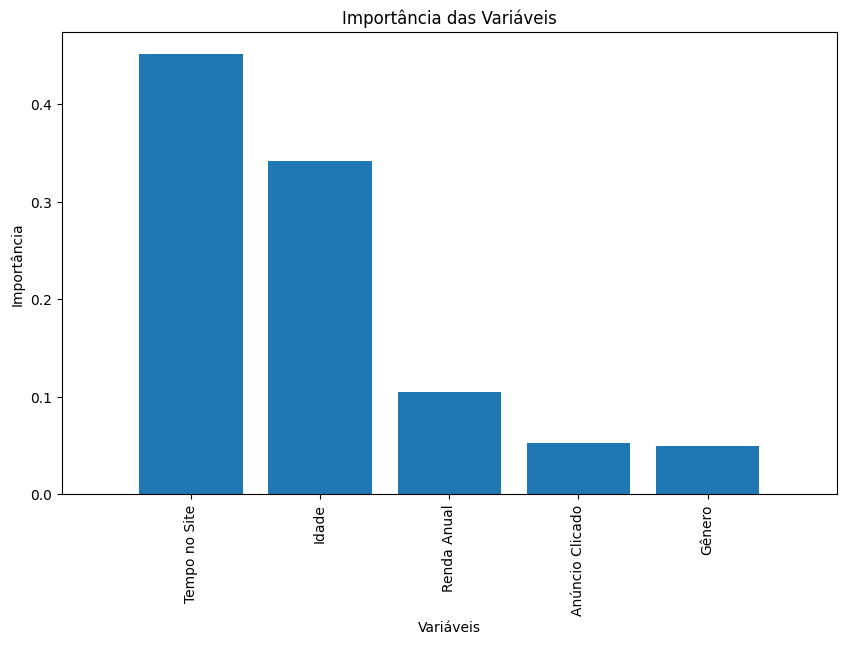

In [ ]:
"""modelo de Random Forest"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Treinar o modelo
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # 100 árvores na floresta
rf_model.fit(X_train, y_train)

# 2. Fazer previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# 3. Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))

print("\nAcurácia do Modelo:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.2f}")

"""Importância das Variáveis"""
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualizar a Importância das Variáveis
feature_names = ['Idade', 'Renda Anual', 'Tempo no Site', 'Gênero', 'Anúncio Clicado']
plt.figure(figsize=(10, 6))
plt.title("Importância das Variáveis")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[indices], rotation=90)  # feature_names deve ser definido como os nomes das variáveis
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Variáveis")
plt.ylabel("Importância")
plt.show()


Matriz de Confusão:
[[22  2]
 [12  4]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.65      0.92      0.76        24
           1       0.67      0.25      0.36        16

    accuracy                           0.65        40
   macro avg       0.66      0.58      0.56        40
weighted avg       0.65      0.65      0.60        40


Acurácia do Modelo:
Acurácia: 0.65


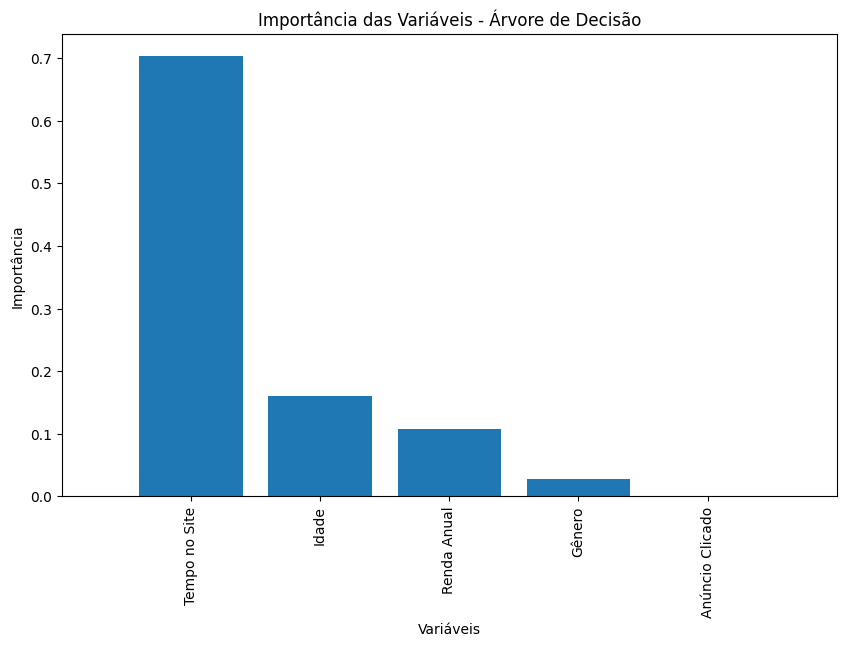

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Definindo os nomes das variáveis
feature_names = ['Idade', 'Renda Anual', 'Tempo no Site', 'Gênero', 'Anúncio Clicado']

# 1. Treinar o modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Profundidade máxima de 5 (ajustável)
dt_model.fit(X_train, y_train)

# 2. Fazer previsões no conjunto de teste
y_pred_dt = dt_model.predict(X_test)

# 3. Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_dt))

print("\nAcurácia do Modelo:")
print(f"Acurácia: {accuracy_score(y_test, y_pred_dt):.2f}")

# 4. Importância das Variáveis
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]

# 5. Visualizar a Importância das Variáveis
plt.figure(figsize=(10, 6))
plt.title("Importância das Variáveis - Árvore de Decisão")
plt.bar(range(len(feature_names)), importances[indices], align='center')
plt.xticks(range(len(feature_names)), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, len(feature_names)])
plt.xlabel("Variáveis")
plt.ylabel("Importância")
plt.show()
